In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
import numpy.polynomial.chebyshev as cheby
% matplotlib inline

In [91]:
max_n=40

In [75]:
def GCLmesh(n):
    mesh = np.zeros(n+1)
    for j in range(0,n+1):
        xj = np.cos(j*np.pi/n)
        mesh[j] = xj
    return mesh

In [77]:
def chebyDiffMatrix(n, mesh):
	d_mat = np.zeros((n+1,n+1))
	for i in range(0,n+1):
		for j in range(0,n+1):
			if(i==0 and j==0):
				entry = (2*(n**2) + 1)/6.0
			elif(i==n and j==n):
				entry = - (2*(n**2) + 1)/6.0
			elif (i==j):
				entry = -mesh[j]/(2.0*( 1-(mesh[j]**2) ) )
			else:
				ci = 2 if (i==0 or i==n) else 1
				cj = 2 if (j==0 or j==n) else 1
				entry = (ci/cj) * ( ((-1)**(i+j)) / (mesh[i] - mesh[j]) )
			d_mat[i,j] = entry
	return d_mat

In [97]:
rng = [i for i in range(1,21)]
rng = 2*np.array(rng)

In [79]:
def f(x):
	return np.exp(x)*np.sin(5*x);

def true_f_prime(x):
	return np.exp(x)*( 5*np.cos(5*x) + np.sin(5*x) );

In [100]:
for n in rng:
    mesh = GCLmesh(n)
    D = chebyDiffMatrix(n, mesh)
    
    us = f(mesh)
    approx_sol = D.dot(us)
    true_sol = true_f_prime(mesh)
    
    residual = true_sol - approx_sol
    error = la.norm(residual, np.inf)
    print ("For n = " +str(n)+ " error = " + str(error))

For n = 2 error = 6.47969747849
For n = 4 error = 10.314920535
For n = 6 error = 3.18759880208
For n = 8 error = 0.264837976393
For n = 10 error = 0.0225155711934
For n = 12 error = 0.00159356054834
For n = 14 error = 6.72416305152e-05
For n = 16 error = 2.1291879817e-06
For n = 18 error = 4.68516476726e-08
For n = 20 error = 6.73486377778e-10
For n = 22 error = 7.89568410653e-12
For n = 24 error = 2.09765538273e-12
For n = 26 error = 1.87028170728e-12
For n = 28 error = 3.01825231475e-12
For n = 30 error = 8.91886564602e-12
For n = 32 error = 1.01805230912e-11
For n = 34 error = 1.55127022339e-11
For n = 36 error = 5.63304958234e-12
For n = 38 error = 1.49857903864e-12
For n = 40 error = 9.14623932147e-12


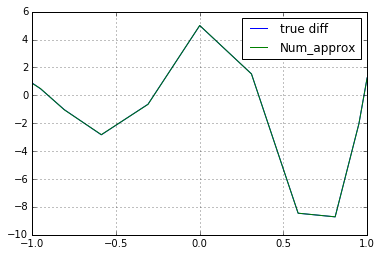

In [84]:
pt.plot(mesh, true_f_prime(mesh), label="true diff")
pt.plot(mesh, approx_sol, label = "Num_approx")
pt.grid()
pt.legend()

In [85]:
residual = true_f_prime(mesh) - approx_sol
error = la.norm(residual, np.inf)

In [86]:
error

0.022515571193442163

In [87]:
residual

array([-0.00230713,  0.00072416,  0.00054431, -0.00253603,  0.00494087,
       -0.00728069,  0.0091255 , -0.01030858,  0.01092869, -0.01119034,
        0.02251557])